# Fashion Mnist CNN 분류 & 중간층 활성화 시각화

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 패키지 불러오기

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import itertools
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import *
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import *
from sklearn.metrics import *

## 데이터 불러오기

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/fashion_mnist/fashion-mnist_train.csv', encoding = 'cp949', engine = 'python')

In [0]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
train.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

#### 모든 클래스 값들이 6000개씩 균등하게 있는 것을 알 수 있다.

In [0]:
test = pd.read_csv('/content/gdrive/My Drive/fashion_mnist/fashion-mnist_test.csv', encoding = 'cp949', engine = 'python')

In [0]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [0]:
test.label.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

#### 테스트 데이터 또한 클래스 값들이 1000개씩 균등하게 있는 것을 알 수 있다.

In [0]:
K.set_learning_phase(0)

In [0]:
train_data = np.array(train, dtype = 'float32')

In [0]:
test_data = np.array(test, dtype='float32')

#### 데이터들을 실수형으로 변환해준다.

In [0]:
x_train = train_data[:,1:] / 255

y_train = train_data[:,0]

x_test= test_data[:,1:] / 255

y_test=test_data[:,0]

#### 타겟데이터를 제외한 값들을 255로 나누어 정규화 해준다.

2번 클래스 의류


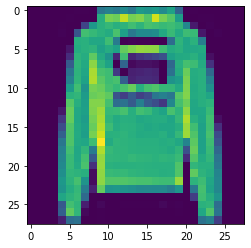

In [113]:
image = x_train[10000,:].reshape(28,28)
print('%s번 클래스 의류'%int(y_train[10000]))
plt.imshow(image)
plt.show()

#### 10000번 데이터는 후드티를 의미하는 것 같다.

In [0]:
image_rows = 28

image_cols = 28

image_shape = (image_rows,image_cols,1)

In [0]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)

#### 입력 값들을 resize해준다.

In [0]:
np.random.seed(2020)

## 모델링

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999 )

In [0]:
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["acc"])

In [0]:
early_stop = [EarlyStopping(monitor = 'val_acc', patience = 10, mode = 'max'), ModelCheckpoint('fashion_mnist7.h5', monitor = 'val_acc', mode = 'max',save_best_only = True, verbose = 1)]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

In [17]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=60,
    verbose=1,
    callbacks = early_stop,
    validation_split = .1, shuffle = True
)

Epoch 1/60
844/844 [==============================] - ETA: 0s - loss: 0.5018 - acc: 0.8228
Epoch 00001: val_acc improved from -inf to 0.86817, saving model to fashion_mnist7.h5
844/844 [==============================] - 22s 26ms/step - loss: 0.5018 - acc: 0.8228 - val_loss: 0.3481 - val_acc: 0.8682
Epoch 2/60
843/844 [============================>.] - ETA: 0s - loss: 0.3283 - acc: 0.8844
Epoch 00002: val_acc improved from 0.86817 to 0.91550, saving model to fashion_mnist7.h5
844/844 [==============================] - 21s 25ms/step - loss: 0.3284 - acc: 0.8844 - val_loss: 0.2463 - val_acc: 0.9155
Epoch 3/60
842/844 [============================>.] - ETA: 0s - loss: 0.2735 - acc: 0.9022
Epoch 00003: val_acc did not improve from 0.91550
844/844 [==============================] - 21s 25ms/step - loss: 0.2737 - acc: 0.9021 - val_loss: 0.2940 - val_acc: 0.8913
Epoch 4/60
842/844 [============================>.] - ETA: 0s - loss: 0.2539 - acc: 0.9105
Epoch 00004: val_acc improved from 0.91550

In [0]:
model = load_model('fashion_mnist6.h5')

#### 제일 성능이  뛰어난 모델을 불러온다.

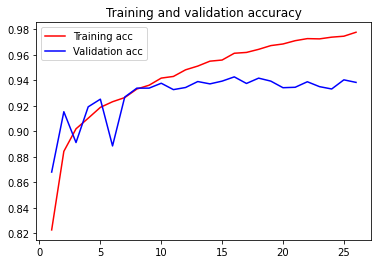

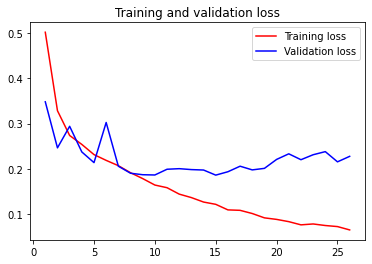

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [0]:
pred = np.argmax(model.predict(x_test), axis = -1)

In [0]:
df = pd.DataFrame({'label': pred})

In [0]:
#df.to_csv('4nd.csv', index = False)

In [0]:
accuracy_score(pred, y_test)

0.9455

#### 테스트 데이터에서 약 94.55%의 정확도를 달성했다.

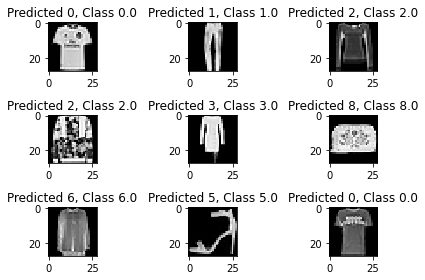

In [0]:
for i, correct in enumerate(np.nonzero(pred==y_test)[0][:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))
    plt.tight_layout()

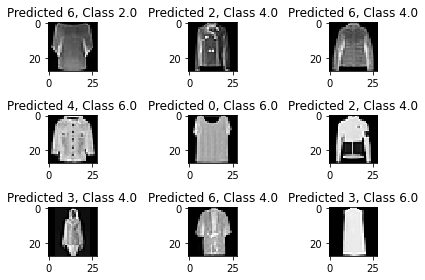

In [0]:
for i, correct in enumerate(np.nonzero(pred!=y_test)[0][:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))
    plt.tight_layout()

## 중간층 활성화 시각화

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
layer_outputs = [layer.output for layer in model.layers[:5]]

#### 모델에서 상위 5개 레이어만 가져온다.

In [0]:
activations_model = Model(inputs = model.input, outputs = layer_outputs)

In [0]:
img = train_data[10000, 1:].reshape(28,28)

####  위에서 본 후드티를 샘플로 가져온다.

In [0]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

In [97]:
img_tensor.shape

(1, 28, 28, 1)

In [0]:
activations = activations_model.predict(img_tensor)

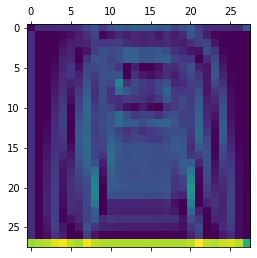

In [122]:
plt.matshow(activations[3][0,:,:,12],cmap = 'viridis')
plt.show()

In [0]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

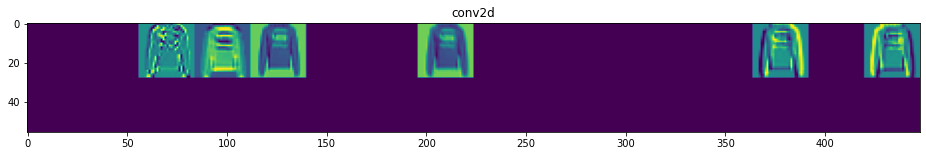

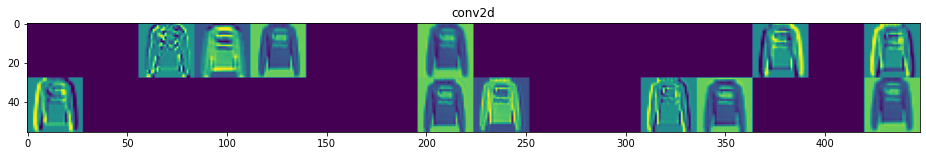

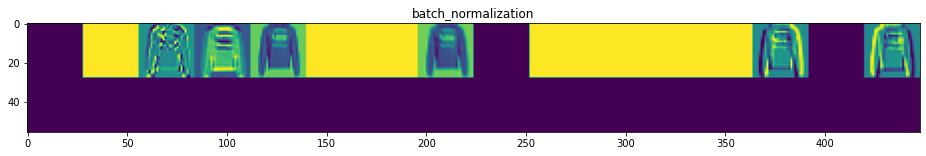

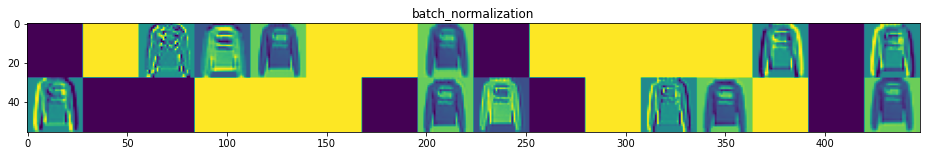

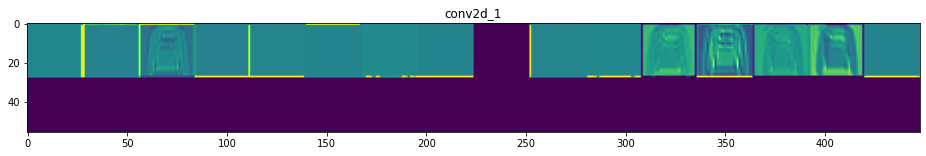

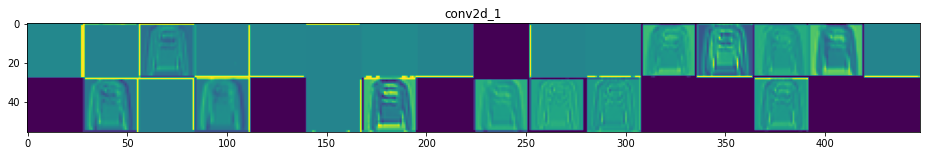

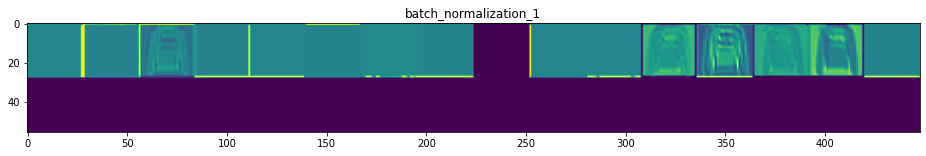

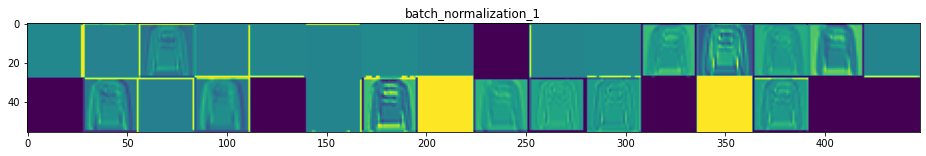

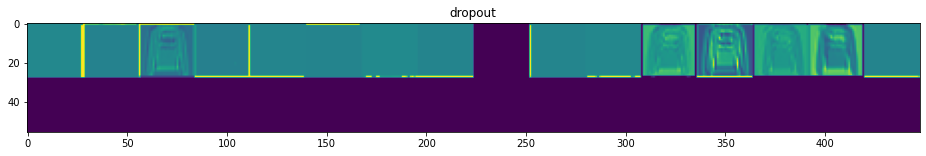

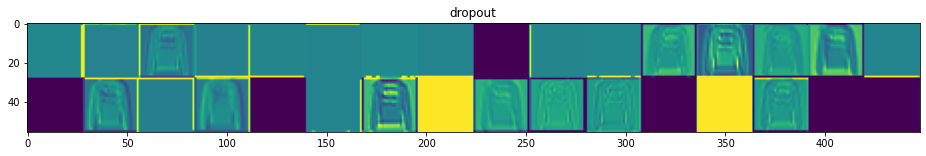

In [101]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')
  plt.show()